In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('data_cleaning.xlsx',sheet_name='Usage',header=None)
df=data.copy()
df

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh
...,...
8755,_1AM Fri 07th-Nov-2014_0.084 kwh
8756,_6AM 20-May-2014__1.027 kwh
8757,__2 AM Tuesday 8th-Apr-2014___0.052 kwh
8758,9 PM 27th-Jan-2014_1.428 kwh


# Data cleaning

In [3]:
new_column_names = ['col']
df.columns = new_column_names

In [4]:
df

,col
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh
...,...
8755,_1AM Fri 07th-Nov-2014_0.084 kwh
8756,_6AM 20-May-2014__1.027 kwh
8757,__2 AM Tuesday 8th-Apr-2014___0.052 kwh
8758,9 PM 27th-Jan-2014_1.428 kwh


In [5]:
import re
from datetime import datetime
import calendar
import timetk

In [6]:
# Replace '_' with space in 'col' column
df['col'] = df['col'].str.replace('_', ' ')


In [7]:
# Add 'Meredian' and 'Unit' columns
df['Meredian'] = df['col'].apply(lambda x: 'AM' if 'AM' in x else ('PM' if 'PM' in x else ''))
df['Unit'] = df['col'].apply(lambda x: 'kwh' if 'kwh' in x else '')

In [8]:
# Remove 'AM', 'PM', 'kwh' from 'col' column
df['col'] = df['col'].str.replace('AM|PM|kwh', '')

In [9]:
df.head(3)

,col,Meredian,Unit
0,3 Mon 24th-Mar-2014 0.384,PM,kwh
1,5 15-Aug-2014 1.201,AM,kwh
2,8 Thu 20-Mar-2014 1.523,PM,kwh


In [10]:
# Trim leading and trailing whitespaces in 'col' column
df['col'] = df['col'].str.strip()

In [11]:
df

,col,Meredian,Unit
0,3 Mon 24th-Mar-2014 0.384,PM,kwh
1,5 15-Aug-2014 1.201,AM,kwh
2,8 Thu 20-Mar-2014 1.523,PM,kwh
3,6 23rd-Apr-2014 0.424,PM,kwh
4,1 Friday 19th-Dec-2014 0.209,AM,kwh
...,...,...,...
8755,1 Fri 07th-Nov-2014 0.084,AM,kwh
8756,6 20-May-2014 1.027,AM,kwh
8757,2 Tuesday 8th-Apr-2014 0.052,AM,kwh
8758,9 27th-Jan-2014 1.428,PM,kwh


In [12]:
# Remove weekday names from 'col' column
df['col'] = df['col'].str.replace('Monday|Mon|Tuesday|Tue|Wednesday|Wed|Thursday|Thu|Friday|Fri|Saturday|Sat|Sunday|Sun', '')

In [13]:
df

,col,Meredian,Unit
0,3 24th-Mar-2014 0.384,PM,kwh
1,5 15-Aug-2014 1.201,AM,kwh
2,8 20-Mar-2014 1.523,PM,kwh
3,6 23rd-Apr-2014 0.424,PM,kwh
4,1 19th-Dec-2014 0.209,AM,kwh
...,...,...,...
8755,1 07th-Nov-2014 0.084,AM,kwh
8756,6 20-May-2014 1.027,AM,kwh
8757,2 8th-Apr-2014 0.052,AM,kwh
8758,9 27th-Jan-2014 1.428,PM,kwh


In [14]:
# Remove 'th', 'rd', 'nd', 'st' from 'col' column
df['col'] = df['col'].str.replace('th|rd|nd|st', '')

In [15]:
df

,col,Meredian,Unit
0,3 24-Mar-2014 0.384,PM,kwh
1,5 15-Aug-2014 1.201,AM,kwh
2,8 20-Mar-2014 1.523,PM,kwh
3,6 23-Apr-2014 0.424,PM,kwh
4,1 19-Dec-2014 0.209,AM,kwh
...,...,...,...
8755,1 07-Nov-2014 0.084,AM,kwh
8756,6 20-May-2014 1.027,AM,kwh
8757,2 8-Apr-2014 0.052,AM,kwh
8758,9 27-Jan-2014 1.428,PM,kwh


In [16]:
# Replace multiple spaces with a single space in 'col' column
df['col'] = df['col'].str.replace('  ', ' ')
df['col'] = df['col'].str.replace('  ', ' ')
df['col'] = df['col'].str.replace('  ', ' ')
df['col'] = df['col'].str.replace('  ', ' ')
df['col'] = df['col'].str.replace('  ', ' ')
df['col'] = df['col'].str.replace('  ', ' ')

In [17]:
df

,col,Meredian,Unit
0,3 24-Mar-2014 0.384,PM,kwh
1,5 15-Aug-2014 1.201,AM,kwh
2,8 20-Mar-2014 1.523,PM,kwh
3,6 23-Apr-2014 0.424,PM,kwh
4,1 19-Dec-2014 0.209,AM,kwh
...,...,...,...
8755,1 07-Nov-2014 0.084,AM,kwh
8756,6 20-May-2014 1.027,AM,kwh
8757,2 8-Apr-2014 0.052,AM,kwh
8758,9 27-Jan-2014 1.428,PM,kwh


In [18]:
# Split 'col' column into 'Hour', 'Date', and 'Usage' columns
df[['Hour', 'Date', 'Usage']] = df['col'].str.split(' ', expand=True)

In [19]:
df

,col,Meredian,Unit,Hour,Date,Usage
0,3 24-Mar-2014 0.384,PM,kwh,3,24-Mar-2014,0.384
1,5 15-Aug-2014 1.201,AM,kwh,5,15-Aug-2014,1.201
2,8 20-Mar-2014 1.523,PM,kwh,8,20-Mar-2014,1.523
3,6 23-Apr-2014 0.424,PM,kwh,6,23-Apr-2014,0.424
4,1 19-Dec-2014 0.209,AM,kwh,1,19-Dec-2014,0.209
...,...,...,...,...,...,...
8755,1 07-Nov-2014 0.084,AM,kwh,1,07-Nov-2014,0.084
8756,6 20-May-2014 1.027,AM,kwh,6,20-May-2014,1.027
8757,2 8-Apr-2014 0.052,AM,kwh,2,8-Apr-2014,0.052
8758,9 27-Jan-2014 1.428,PM,kwh,9,27-Jan-2014,1.428


In [20]:
# Convert 'Hour' and 'Usage' columns to integer
df['Hour'] = df['Hour'].astype(int)
df['Usage'] = df['Usage'].astype(float)

In [21]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

In [22]:
# Add 'Weekday' column
df['Weekday'] = df['Date'].dt.dayofweek.apply(lambda x: calendar.day_abbr[x])

In [23]:
df

,col,Meredian,Unit,Hour,Date,Usage,Weekday
0,3 24-Mar-2014 0.384,PM,kwh,3,2014-03-24,0.384,Mon
1,5 15-Aug-2014 1.201,AM,kwh,5,2014-08-15,1.201,Fri
2,8 20-Mar-2014 1.523,PM,kwh,8,2014-03-20,1.523,Thu
3,6 23-Apr-2014 0.424,PM,kwh,6,2014-04-23,0.424,Wed
4,1 19-Dec-2014 0.209,AM,kwh,1,2014-12-19,0.209,Fri
...,...,...,...,...,...,...,...
8755,1 07-Nov-2014 0.084,AM,kwh,1,2014-11-07,0.084,Fri
8756,6 20-May-2014 1.027,AM,kwh,6,2014-05-20,1.027,Tue
8757,2 8-Apr-2014 0.052,AM,kwh,2,2014-04-08,0.052,Tue
8758,9 27-Jan-2014 1.428,PM,kwh,9,2014-01-27,1.428,Mon


In [24]:
# Sort raw DataFrame by 'Date'
df = df.sort_values('Date')


In [25]:
df

,col,Meredian,Unit,Hour,Date,Usage,Weekday
4837,6 1-Jan-2014 2.856,PM,kwh,6,2014-01-01,2.856,Wed
6515,8 1-Jan-2014 0.656,AM,kwh,8,2014-01-01,0.656,Wed
4106,3 1-Jan-2014 0.396,AM,kwh,3,2014-01-01,0.396,Wed
6633,11 1-Jan-2014 1.13,PM,kwh,11,2014-01-01,1.130,Wed
1815,5 01-Jan-2014 2.354,AM,kwh,5,2014-01-01,2.354,Wed
...,...,...,...,...,...,...,...
7279,1 31-Dec-2014 0.524,PM,kwh,1,2014-12-31,0.524,Wed
7552,3 31-Dec-2014 0.356,PM,kwh,3,2014-12-31,0.356,Wed
8187,8 31-Dec-2014 0.361,AM,kwh,8,2014-12-31,0.361,Wed
2993,6 31-Dec-2014 1.448,PM,kwh,6,2014-12-31,1.448,Wed


In [26]:
df=df.drop(columns='col')

In [27]:
df

,Meredian,Unit,Hour,Date,Usage,Weekday
4837,PM,kwh,6,2014-01-01,2.856,Wed
6515,AM,kwh,8,2014-01-01,0.656,Wed
4106,AM,kwh,3,2014-01-01,0.396,Wed
6633,PM,kwh,11,2014-01-01,1.130,Wed
1815,AM,kwh,5,2014-01-01,2.354,Wed
...,...,...,...,...,...,...
7279,PM,kwh,1,2014-12-31,0.524,Wed
7552,PM,kwh,3,2014-12-31,0.356,Wed
8187,AM,kwh,8,2014-12-31,0.361,Wed
2993,PM,kwh,6,2014-12-31,1.448,Wed


In [28]:
df = df.reset_index(drop=True)

In [29]:
df

,Meredian,Unit,Hour,Date,Usage,Weekday
0,PM,kwh,6,2014-01-01,2.856,Wed
1,AM,kwh,8,2014-01-01,0.656,Wed
2,AM,kwh,3,2014-01-01,0.396,Wed
3,PM,kwh,11,2014-01-01,1.130,Wed
4,AM,kwh,5,2014-01-01,2.354,Wed
...,...,...,...,...,...,...
8755,PM,kwh,1,2014-12-31,0.524,Wed
8756,PM,kwh,3,2014-12-31,0.356,Wed
8757,AM,kwh,8,2014-12-31,0.361,Wed
8758,PM,kwh,6,2014-12-31,1.448,Wed


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Meredian  8760 non-null   object        
 1   Unit      8760 non-null   object        
 2   Hour      8760 non-null   int32         
 3   Date      8760 non-null   datetime64[ns]
 4   Usage     8760 non-null   float64       
 5   Weekday   8760 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 376.5+ KB


In [31]:
df.isna().sum()

Meredian    0
Unit        0
Hour        0
Date        0
Usage       0
Weekday     0
dtype: int64

# Questions

In [32]:
df.head()

,Meredian,Unit,Hour,Date,Usage,Weekday
0,PM,kwh,6,2014-01-01,2.856,Wed
1,AM,kwh,8,2014-01-01,0.656,Wed
2,AM,kwh,3,2014-01-01,0.396,Wed
3,PM,kwh,11,2014-01-01,1.130,Wed
4,AM,kwh,5,2014-01-01,2.354,Wed


In [33]:
df

,Meredian,Unit,Hour,Date,Usage,Weekday
0,PM,kwh,6,2014-01-01,2.856,Wed
1,AM,kwh,8,2014-01-01,0.656,Wed
2,AM,kwh,3,2014-01-01,0.396,Wed
3,PM,kwh,11,2014-01-01,1.130,Wed
4,AM,kwh,5,2014-01-01,2.354,Wed
...,...,...,...,...,...,...
8755,PM,kwh,1,2014-12-31,0.524,Wed
8756,PM,kwh,3,2014-12-31,0.356,Wed
8757,AM,kwh,8,2014-12-31,0.361,Wed
8758,PM,kwh,6,2014-12-31,1.448,Wed


In [34]:
#q1
#What is your average hourly electricity 
#usage?
average_usage = df.groupby('Hour')['Usage'].mean()
print('Average hourly electricity usage : ' ,average_usage.mean())
#answer:B

Average hourly electricity usage :  0.7816459119848497


In [35]:
#q2
#What is your average electricity usage
#perhour in February?
february_data = df[df['Date'].dt.month == 2]
average_usage_february = february_data.groupby('Hour')['Usage'].mean()
print('Average hourly electricity usage in february : ' ,average_usage_february.mean())
#answer:D

Average hourly electricity usage in february :  0.8331759740259742


Day of the week has the highestaverage usage :  Sun


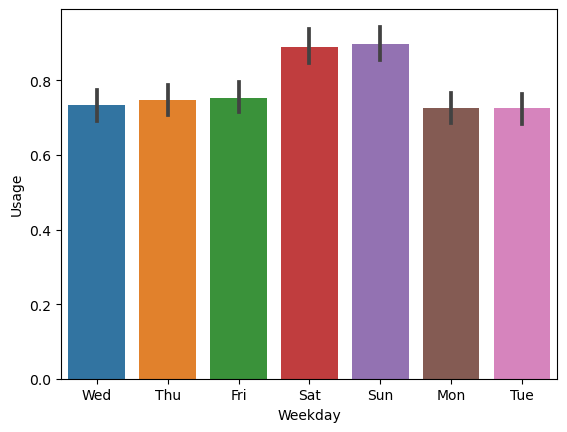

In [36]:
#q3
#Which day of the week has the 
#highestaverage usage?
sns.barplot(data=df,x='Weekday',y='Usage')

average_usage_per_day = df.groupby('Weekday')['Usage'].mean()
highest_average_usage_day = average_usage_per_day.idxmax()
print('Day of the week has the highestaverage usage : ',highest_average_usage_day)

#answer:A

In [37]:
#q4
#What is the highest amount of 
#electricityused in a continuous 4 hour
#period?

df = df.sort_values('Hour')

# Reset the index of the DataFrame

df = df.reset_index(drop=True)

# Initialize variables to track the maximum usage and its corresponding start hour
max_usage = 0
start_hour = 0

# Iterate through the DataFrame to find the 4-hour period with the highest usage
for i in range(len(df)- 4):
    current_usage = df.loc[i:i+4, 'Usage'].sum()
    if current_usage > max_usage:
        max_usage = current_usage
        start_hour = df.loc[i, 'Hour']
        

print("The highest amount of electricity used in a continuous 4-hour period is : ", max_usage)
print("The period starts at hour : ", start_hour)

#answer:C

The highest amount of electricity used in a continuous 4-hour period is :  16.917
The period starts at hour :  7


In [38]:
#q5
# Based on your historic electricity usage,
# what would your annual cost of 
# electricitybe under the "Monthly Flex"
# contract?

#Monthly Flex costs


monthly_usage = df.groupby(df['Date'].dt.month)['Usage'].sum()

# Monthly rates ($/kWh)
monthly_rates = {
    "January": 0.20,
    "February": 0.19,
    "March": 0.17,
    "April": 0.18,
    "May": 0.22,
    "June": 0.27,
    "July": 0.24,
    "August": 0.19,
    "September": 0.18,
    "October": 0.15,
    "November": 0.14,
    "December": 0.19
}

# Historic usage data (kWh)
historic_usage = [1042.660, 559.436, 422.655, 151.666, 416.813, 899.904, 1255.351, 635.819, 348.723, 313.719, 232.420, 568.948]

# Calculate monthly costs
monthly_costs = [rate * usage for rate, usage in zip(monthly_rates.values(), historic_usage)]

# Calculate annual cost
annual_cost = sum(monthly_costs)

# Display the monthly costs and annual cost
for month, cost in zip(monthly_rates.keys(), monthly_costs):
    print(f"{month}: ${cost:.2f}")
print(f"Annual cost: ${annual_cost:.2f}")
#Answer:B

January: $208.53
February: $106.29
March: $71.85
April: $27.30
May: $91.70
June: $242.97
July: $301.28
August: $120.81
September: $62.77
October: $47.06
November: $32.54
December: $108.10
Annual cost: $1421.21


In [39]:
#q6
# Based on your historic electricity 
# usage, which of the three contracts 
# would pro- duce the lowest annual 
# cost?

#No flex costs=$1438.10

#Hourly Flex costs=$1389.35

#Monthly Flex costs=$1421.21

#Answer:C

In [40]:
#No flex costs

# Flat rate for "No Flex" contract
flat_rate = 0.21  # $/kWh

# Historic usage data (kWh) for each month
historic_usage = [1042.660, 559.436, 422.655, 151.666, 416.813, 899.904, 1255.351, 635.819, 348.723, 313.719, 232.420, 568.948]

# Calculate the total annual usage
total_usage = sum(historic_usage)

# Calculate the annual cost
annual_cost = total_usage * flat_rate

# Print the annual cost of electricity under the "No Flex" contract
print("The estimated annual cost of electricity under the 'No Flex' contract is:", annual_cost)


The estimated annual cost of electricity under the 'No Flex' contract is: 1438.10394


In [41]:
 # Adjust the hour values based on the 'Meredian' column
 df.loc[df['Meredian'] == 'PM', 'Hour'] = df.loc[df['Meredian'] == 'PM', 'Hour'].astype(int) + 12

 # Create a new column to represent the 24-hour format hour
 df['24-hour'] = df['Hour'].astype(int)

 # Display the 24-hour usage and usage per hour
 hourly_usage = df.groupby('24-hour')['Usage'].sum()
 print(hourly_usage)


24-hour
1      93.966
2      92.192
3      92.315
4      93.596
5     354.582
6     446.288
7     399.243
8     268.043
9     190.439
10    183.174
11    213.951
12    181.638
13    184.716
14    208.166
15    220.122
16    219.374
17    481.243
18    619.418
19    731.126
20    670.779
21    223.139
22    210.731
23    257.327
24    212.546
Name: Usage, dtype: float64


In [42]:
#Hourly Flex costs

# Hourly rates ($/kWh) for the "Hourly Flex" contract
hourly_rates = {
    "12AM until 1AM": 0.10,
    "1AM until 2AM": 0.10,
    "2AM until 3AM": 0.10,
    "3AM until 4AM": 0.10,
    "4AM until 5AM": 0.15,
    "5AM until 6AM": 0.20,
    "6AM until 7AM": 0.24,
    "7AM until 8AM": 0.24,
    "8AM until 9AM": 0.26,
    "9AM until 10AM": 0.20,
    "10AM until 11AM": 0.20,
    "11AM until 12PM": 0.26,
    "12PM until 1PM": 0.26,
    "1PM until 2PM": 0.20,
    "2PM until 3PM": 0.24,
    "3PM until 4PM": 0.18,
    "4PM until 5PM": 0.15,
    "5PM until 6PM": 0.30,
    "6PM until 7PM": 0.24,
    "7PM until 8PM": 0.24,
    "8PM until 9PM": 0.12,
    "9PM until 10PM": 0.11,
    "10PM until 11PM": 0.10,
    "11PM until 12AM": 0.10
}

# Historic usage data (kWh) for each hour
historic_usage = [93.966, 92.192, 92.315, 93.596, 354.582, 446.288, 399.243, 268.043, 190.439, 183.174, 213.951, 181.638, 184.716, 208.166, 220.1219, 219.374, 481.243, 619.418, 731.126, 670.779, 223.139, 210.731, 257.327, 212.546]

# Calculate the hourly costs
hourly_costs = [rate * usage for rate, usage in zip(hourly_rates.values(), historic_usage)]

# Calculate the annual cost
annual_cost = sum(hourly_costs)

# Print the annual cost of electricity under the "Hourly Flex" contract
print("The estimated annual cost of electricity under the 'Hourly Flex' contract is:", annual_cost)


The estimated annual cost of electricity under the 'Hourly Flex' contract is: 1389.354836


In [43]:
monthly_usage = df.groupby(df['Date'].dt.month)['Usage'].sum()

# Monthly rates ($/kWh)
monthly_rates = {
    "January": 0.20,
    "February": 0.19,
    "March": 0.17,
    "April": 0.18,
    "May": 0.22,
    "June": 0.27,
    "July": 0.24,
    "August": 0.19,
    "September": 0.18,
    "October": 0.15,
    "November": 0.14,
    "December": 0.19
}

# Historic usage data (kWh)
historic_usage = [1042.660, 559.436, 422.655, 151.666, 416.813, 899.904, 1255.351, 635.819, 348.723, 313.719, 232.420, 568.948]

# Calculate monthly costs
monthly_costs = [rate * usage for rate, usage in zip(monthly_rates.values(), historic_usage)]

# Calculate annual cost
annual_cost = sum(monthly_costs)

# Display the monthly costs and annual cost
for month, cost in zip(monthly_rates.keys(), monthly_costs):
    print(f"{month}: ${cost:.2f}")
print(f"Annual cost: ${annual_cost:.2f}")

January: $208.53
February: $106.29
March: $71.85
April: $27.30
May: $91.70
June: $242.97
July: $301.28
August: $120.81
September: $62.77
October: $47.06
November: $32.54
December: $108.10
Annual cost: $1421.21
